In [64]:
import pandas as pd  #import Libraries
import requests
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np

In [65]:
# SpaceX API URL
url = "https://api.spacexdata.com/v4/launches"

# API call
response = requests.get(url)

# Convert JSON to Python list of dictionaries
launch_data = response.json()

# Convert to DataFrame
df = pd.json_normalize(launch_data)

In [66]:
df.head(5)

,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,crew,ships,...,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 33, 'altitude': None, 'reason': 'mer...",Engine failure at 33 seconds and loss of vehicle,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-fa...,https://en.wikipedia.org/wiki/DemoSat,NaN
1,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 301, 'altitude': 289, 'reason': 'har...",Successful first stage burn and transition to ...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=Lk4zQ2wP-Nc,Lk4zQ2wP-Nc,https://www.space.com/3590-spacex-falcon-1-roc...,https://en.wikipedia.org/wiki/DemoSat,NaN
2,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 140, 'altitude': 35, 'reason': 'resi...",Residual stage 1 thrust led to collision betwe...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=v0w9p3U8860,v0w9p3U8860,http://www.spacex.com/news/2013/02/11/falcon-1...,https://en.wikipedia.org/wiki/Trailblazer_(sat...,NaN
3,2008-09-20T00:00:00.000Z,1.221869e+09,False,0.0,5e9d0d95eda69955f709d1eb,True,[],Ratsat was carried to orbit on the first succe...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=dLQ2tZEH6G0,dLQ2tZEH6G0,https://en.wikipedia.org/wiki/Ratsat,https://en.wikipedia.org/wiki/Ratsat,NaN
4,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,True,[],None,[],[],...,None,None,[],[],http://www.spacex.com/press/2012/12/19/spacexs...,https://www.youtube.com/watch?v=yTaIDooc8Og,yTaIDooc8Og,http://www.spacex.com/news/2013/02/12/falcon-1...,https://en.wikipedia.org/wiki/RazakSAT,NaN


In [67]:
df.columns

Index(['static_fire_date_utc', 'static_fire_date_unix', 'net', 'window',
       'rocket', 'success', 'failures', 'details', 'crew', 'ships', 'capsules',
       'payloads', 'launchpad', 'flight_number', 'name', 'date_utc',
       'date_unix', 'date_local', 'date_precision', 'upcoming', 'cores',
       'auto_update', 'tbd', 'launch_library_id', 'id', 'fairings.reused',
       'fairings.recovery_attempt', 'fairings.recovered', 'fairings.ships',
       'links.patch.small', 'links.patch.large', 'links.reddit.campaign',
       'links.reddit.launch', 'links.reddit.media', 'links.reddit.recovery',
       'links.flickr.small', 'links.flickr.original', 'links.presskit',
       'links.webcast', 'links.youtube_id', 'links.article', 'links.wikipedia',
       'fairings'],
      dtype='object')

In [68]:
df.shape

(205, 43)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   static_fire_date_utc       121 non-null    object 
 1   static_fire_date_unix      121 non-null    float64
 2   net                        205 non-null    bool   
 3   window                     117 non-null    float64
 4   rocket                     205 non-null    object 
 5   success                    186 non-null    object 
 6   failures                   205 non-null    object 
 7   details                    134 non-null    object 
 8   crew                       205 non-null    object 
 9   ships                      205 non-null    object 
 10  capsules                   205 non-null    object 
 11  payloads                   205 non-null    object 
 12  launchpad                  205 non-null    object 
 13  flight_number              205 non-null    int64  

In [70]:
df.isnull().sum()

static_fire_date_utc          84
static_fire_date_unix         84
net                            0
window                        88
rocket                         0
success                       19
failures                       0
details                       71
crew                           0
ships                          0
capsules                       0
payloads                       0
launchpad                      0
flight_number                  0
name                           0
date_utc                       0
date_unix                      0
date_local                     0
date_precision                 0
upcoming                       0
cores                          0
auto_update                    0
tbd                            0
launch_library_id            133
id                             0
fairings.reused              112
fairings.recovery_attempt     98
fairings.recovered           120
fairings.ships                36
links.patch.small             16
links.patc

In [71]:
# Drop columns with > 50% missing or irrelevant
cols_to_drop = ['fairings', 'launch_library_id', 'fairings.reused', 'fairings.recovered',
                'links.reddit.media', 'links.reddit.recovery', 'links.presskit']
df_clean = df.drop(columns=cols_to_drop)

# Drop rows with missing 'success'
df_clean = df_clean.dropna(subset=['success'])

# Convert 'success' to boolean or int (if not already)
df_clean['success'] = df_clean['success'].astype(bool)

print(df_clean.shape)
print(df_clean.isnull().sum())

(186, 36)
static_fire_date_utc         65
static_fire_date_unix        65
net                           0
window                       69
rocket                        0
success                       0
failures                      0
details                      52
crew                          0
ships                         0
capsules                      0
payloads                      0
launchpad                     0
flight_number                 0
name                          0
date_utc                      0
date_unix                     0
date_local                    0
date_precision                0
upcoming                      0
cores                         0
auto_update                   0
tbd                           0
id                            0
fairings.recovery_attempt    79
fairings.ships               35
links.patch.small             0
links.patch.large             0
links.reddit.campaign        39
links.reddit.launch          23
links.flickr.small            

In [72]:
# Create static_fire_test_done flag
df_clean['static_fire_test_done'] = df_clean['static_fire_date_utc'].notnull().astype(int)

# Drop original static_fire_date columns if you want
df_clean = df_clean.drop(columns=['static_fire_date_utc', 'static_fire_date_unix'])

# Impute 'window' missing values with median or -1
df_clean['window'] = df_clean['window'].fillna(df_clean['window'].median())

# Fill missing 'details' with placeholder
df_clean['details'] = df_clean['details'].fillna("No details")

# Fill missing 'fairings.recovery_attempt' with False or 'No'
df_clean['fairings.recovery_attempt'] = df_clean['fairings.recovery_attempt'].fillna(False)

# For other link columns, fill missing with empty string
link_cols = ['fairings.ships', 'links.reddit.campaign', 'links.reddit.launch', 
             'links.article', 'links.wikipedia']

for col in link_cols:
    df_clean[col] = df_clean[col].fillna("")

# Extract launch year, month, day
df_clean['launch_year'] = pd.to_datetime(df_clean['date_utc']).dt.year
df_clean['launch_month'] = pd.to_datetime(df_clean['date_utc']).dt.month
df_clean['launch_day'] = pd.to_datetime(df_clean['date_utc']).dt.day
df_clean['launch_weekday'] = pd.to_datetime(df_clean['date_utc']).dt.weekday

# Convert booleans to int
bool_cols = ['net', 'upcoming', 'auto_update', 'tbd']
for col in bool_cols:
    df_clean[col] = df_clean[col].astype(int)

print(df_clean.isnull().sum())  # Check missing again
print(df_clean.shape)


net                          0
window                       0
rocket                       0
success                      0
failures                     0
details                      0
crew                         0
ships                        0
capsules                     0
payloads                     0
launchpad                    0
flight_number                0
name                         0
date_utc                     0
date_unix                    0
date_local                   0
date_precision               0
upcoming                     0
cores                        0
auto_update                  0
tbd                          0
id                           0
fairings.recovery_attempt    0
fairings.ships               0
links.patch.small            0
links.patch.large            0
links.reddit.campaign        0
links.reddit.launch          0
links.flickr.small           0
links.flickr.original        0
links.webcast                2
links.youtube_id             2
links.ar

In [73]:
df_clean['links.webcast'] = df_clean['links.webcast'].fillna("")
df_clean['links.youtube_id'] = df_clean['links.youtube_id'].fillna("")

In [74]:
from sklearn.preprocessing import LabelEncoder

In [75]:
le = LabelEncoder()

In [76]:
# Categorical columns to encode
categorical_cols = ['rocket', 'launchpad', 'cores', 'crew', 'ships', 'capsules', 'payloads']

# Encode each column
for col in categorical_cols:
    df_clean[col] = le.fit_transform(df_clean[col].astype(str))

In [77]:
# Target variable 
target = 'success'

# Feature columns (prediction helping columns)
features = df_clean.drop(columns=[target, 'name', 'details', 'id', 'date_utc', 'date_local'])

X = features
y = df_clean[target]

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train, 20% test

In [79]:
# Example: get number of cores as a feature
X_train['num_cores'] = X_train['cores'].apply(lambda x: len(x) if isinstance(x, list) else 0)
X_test['num_cores'] = X_test['cores'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Then drop the original 'cores' column
X_train = X_train.drop(columns=['cores'])
X_test = X_test.drop(columns=['cores'])


In [80]:
X = df.drop(['success', 'id', 'name'], axis=1)  # Features
y = df['success']  # Target


In [81]:
def drop_list_columns(df):
    # remove columns  list and dict 
    return df[[col for col in df.columns if df[col].apply(lambda x: isinstance(x, (list, dict))).sum() == 0]]

X_train_clean = drop_list_columns(X_train)
X_test_clean = X_test[X_train_clean.columns]  # Ensure same columns


In [82]:
X_train_clean = drop_list_columns(X_train)
X_test_clean = X_test[X_train_clean.columns]


In [83]:
# Combine train and test data to ensure consistent one-hot encoding
combined = pd.concat([X_train_clean, X_test_clean], axis=0)

# Convert all object/string columns to numeric using one-hot encoding
combined_encoded = pd.get_dummies(combined)

# Split the combined dataframe back to train and test sets
X_train_encoded = combined_encoded.iloc[:len(X_train_clean), :]
X_test_encoded = combined_encoded.iloc[len(X_train_clean):, :]

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize classifier
clf = RandomForestClassifier(random_state=42)

# Train
clf.fit(X_train_encoded, y_train)

# Predict
y_pred = clf.predict(X_test_encoded)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

        True       1.00      1.00      1.00        38

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [85]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

        True       1.00      1.00      1.00        38

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [86]:
# Import cross_val_score to evaluate model performance using cross-validation

from sklearn.model_selection import cross_val_score
cross_val_score(clf, X_train_encoded, y_train, cv=5)


# Perform 5-fold cross-validation on the classifier
# - clf: your trained model
# - X_train_encoded: input features (encoded)
# - y_train: target labels
# - cv=5: split data into 5 parts, train on 4, test on 1 (repeat 5 times)

array([0.96666667, 1.        , 0.96666667, 0.96551724, 0.96551724])

In [87]:
import joblib

# Save the trained model to a file
joblib.dump(clf, 'my_random_forest_model.joblib')

['my_random_forest_model.joblib']

C:\Users\USER-PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER-PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


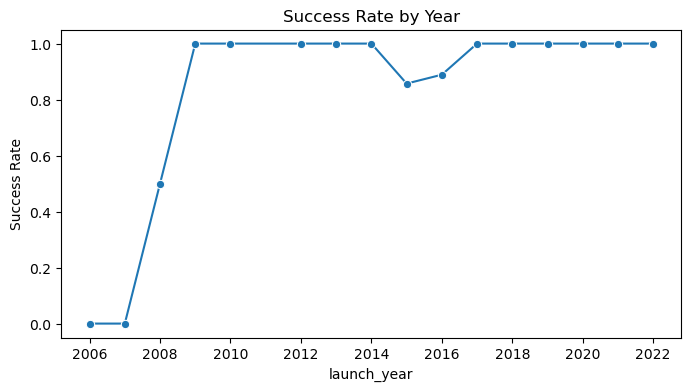

In [90]:


# Make sure 'launch_success' is numeric 0/1
df['launch_success'] = df['success'].astype(int)

# 1) Success rate over the years
yearly = df.groupby('launch_year')['launch_success'].mean().reset_index()
plt.figure(figsize=(8,4))
sns.lineplot(x='launch_year', y='launch_success', data=yearly, marker='o')
plt.title('Success Rate by Year')
plt.ylabel('Success Rate')
plt.show()

AttributeError: 'numpy.int32' object has no attribute 'startswith'

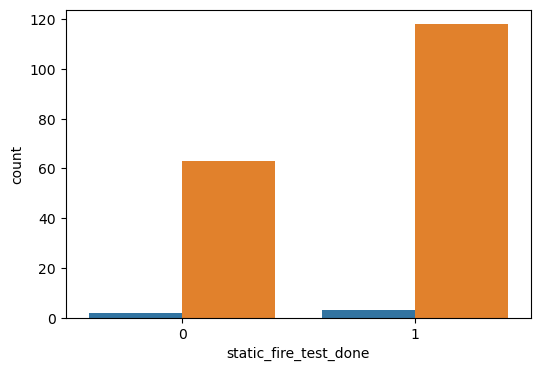

In [96]:
# 4) Static Fire Test Flag vs Success
plt.figure(figsize=(6,4))
sns.countplot(x='static_fire_test_done', hue='launch_success', data=df)
plt.title('Static Fire Test Done vs Launch Success')
plt.show()


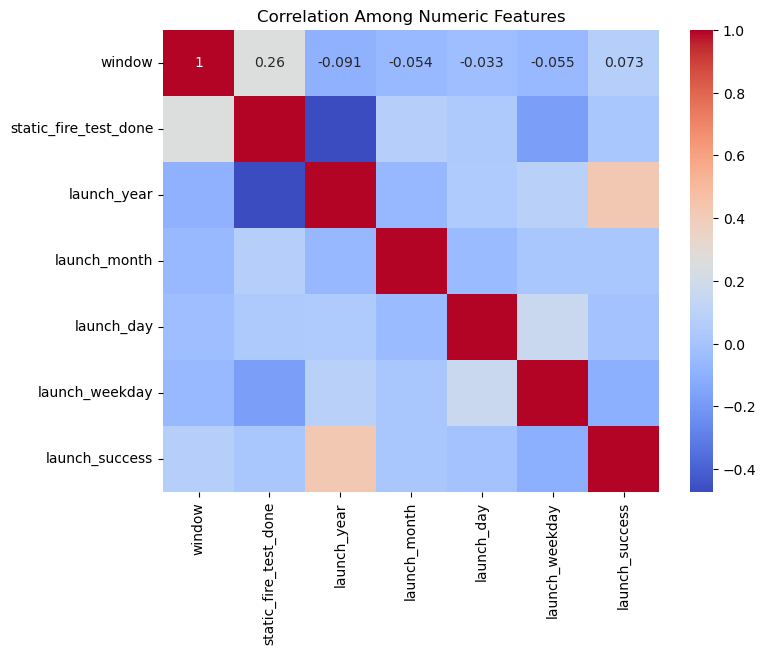

In [95]:

# Correlation Heatmap of Numeric Features
num_cols = ['window', 'static_fire_test_done', 'launch_year', 
            'launch_month', 'launch_day', 'launch_weekday', 'launch_success']
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Among Numeric Features')
plt.show()


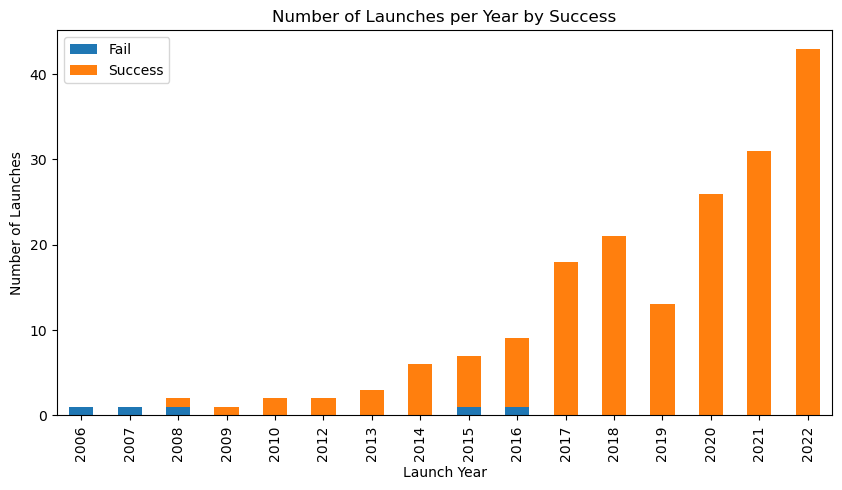

In [101]:
launch_year_success = df.groupby(['launch_year', 'launch_success']).size().unstack()
launch_year_success.plot(kind='bar', stacked=True, figsize=(10,5))
plt.title('Number of Launches per Year by Success')
plt.xlabel('Launch Year')
plt.ylabel('Number of Launches')
plt.legend(['Fail', 'Success'])
plt.show()

In [105]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize Decision Tree classifier
dt_clf = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model
dt_clf.fit(X_train_encoded, y_train)

# Predict on the test set
y_pred_dt = dt_clf.predict(X_test_encoded)

# Calculate evaluation metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"Decision Tree Precision: {precision_dt:.4f}")
print(f"Decision Tree Recall: {recall_dt:.4f}")
print(f"Decision Tree F1 Score: {f1_dt:.4f}")

Decision Tree Accuracy: 1.0000
Decision Tree Precision: 1.0000
Decision Tree Recall: 1.0000
Decision Tree F1 Score: 1.0000


In [106]:
from sklearn.model_selection import cross_val_score

cv_scores_dt = cross_val_score(dt_clf, X_train_encoded, y_train, cv=5)
print("Decision Tree CV Scores:", cv_scores_dt)
print("Average CV accuracy:", cv_scores_dt.mean())


Decision Tree CV Scores: [1.         1.         0.93333333 0.96551724 1.        ]
Average CV accuracy: 0.9797701149425289


In [113]:
pip install streamlit-folium

   ---------------------------------------- 0.0/328.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/328.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/328.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/328.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/328.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/328.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/328.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/328.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/328.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/328.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/328.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/328.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/328.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/328.4 kB ? eta -:--:--

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\USER-PC\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\USER-PC\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER-PC\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER-PC\anaconda3\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 98, in read
    data: bytes = self.__fp.read(amt)
                  ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER-PC\anaconda3\Lib\http\client.py", line 473, in read
    s = self.fp.read(amt)
        ^^^^^^^^^^^^^^^^^
  File "C:\Users\USER-PC\anaconda3\Lib\socket.py", line 706, in readinto
    return self._sock.recv_into(b)



   --------------------------------- ------ 8.2/9.9 MB 41.4 kB/s eta 0:00:41
   --------------------------------- ------ 8.2/9.9 MB 41.4 kB/s eta 0:00:41
   --------------------------------- ------ 8.2/9.9 MB 41.4 kB/s eta 0:00:41
   --------------------------------- ------ 8.2/9.9 MB 41.4 kB/s eta 0:00:41
   --------------------------------- ------ 8.2/9.9 MB 41.4 kB/s eta 0:00:41
   --------------------------------- ------ 8.2/9.9 MB 41.4 kB/s eta 0:00:41
   --------------------------------- ------ 8.2/9.9 MB 41.4 kB/s eta 0:00:41
   --------------------------------- ------ 8.2/9.9 MB 41.4 kB/s eta 0:00:41
   --------------------------------- ------ 8.2/9.9 MB 41.4 kB/s eta 0:00:41
   --------------------------------- ------ 8.2/9.9 MB 41.4 kB/s eta 0:00:41
   --------------------------------- ------ 8.2/9.9 MB 41.4 kB/s eta 0:00:41
   --------------------------------- ------ 8.2/9.9 MB 41.4 kB/s eta 0:00:41
   --------------------------------- ------ 8.2/9.9 MB 41.4 kB/s eta 0:00:4

In [111]:
pip install folium

   ---------------------------------------- 0.0/112.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/112.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/112.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/112.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/112.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/112.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/112.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/112.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/112.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/112.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/112.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/112.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/112.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/112.5 kB ? eta -:--:--
   ---

In [117]:
import folium
from IPython.display import display

# Create a map centered at a location
m = folium.Map(location=[28.5, -80.5], zoom_start=5)

# Add markers for launch sites
folium.Marker([28.561857, -80.577366], popup='CCAFS LC-40').add_to(m)
folium.Marker([34.632834, -120.610746], popup='VAFB SLC-4E').add_to(m)
folium.Marker([28.608058, -80.603955], popup='KSC LC-39A').add_to(m)

# Display the map in Jupyter
display(m)


In [121]:
import streamlit as st

st.title("SpaceX Launch Success Predictor")

st.write("Welcome! Use the sidebar to filter data and see predictions.")


2025-05-25 06:13:22.494 
  command:

    streamlit run C:\Users\USER-PC\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [124]:
pip install streamlit-folium

Note: you may need to restart the kernel to use updated packages.
  Using cached streamlit_folium-0.25.0-py3-none-any.whl.metadata (621 bytes)
  Using cached streamlit-1.45.1-py3-none-any.whl.metadata (8.9 kB)
Using cached streamlit_folium-0.25.0-py3-none-any.whl (328 kB)
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB 163.8 kB/s eta 0:01:00
   ---------------------------------------- 0.0/9.9 MB 178.6 kB/s eta 0:00:55
   ---------------------------------------- 0.1/9.9 MB 233.8 kB/s eta 0:00:42
   ---------------------------------------- 0.1/9.9 MB 308.0 kB/s eta 0:00:32
    --------------------------------------- 0.1/9.9 MB 448.2 kB/s eta 0:00:22
    --------------------------------------- 0.2/9.9 MB 625.1 kB/s eta 0:00:16
   - -------------------------------------- 0.3/9.9 

In [137]:
import streamlit as st

st.title("SpaceX Launch Success Predictor")

st.write("Welcome! Use the sidebar to filter data and see predictions.")
